In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(X, y, clf,figure,ax,title):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['cyan', 'orange', 'green'])
    cmap_bold = ListedColormap(['c', 'darkorange', 'darkgreen'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_title(title)

#     plt.show()


In [3]:
#Point 1
#Import wine dataset and save it like a pandas dataframe
from sklearn.datasets import load_wine
wine = load_wine()
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
print(features.shape)
dataset = features
dataset['target']=wine['target']
dataset['class']=dataset['target'].map(lambda i: wine['target_names'][i])
data_fin=dataset.drop(columns=dataset.columns[2:])
data_fin['target']=wine['target']
data_fin['class']=dataset['target'].map(lambda i: wine['target_names'][i])
data_fin

(178, 13)


,alcohol,malic_acid,target,class
0,14.23,1.71,0,class_0
1,13.20,1.78,0,class_0
2,13.16,2.36,0,class_0
3,14.37,1.95,0,class_0
4,13.24,2.59,0,class_0
...,...,...,...,...
173,13.71,5.65,2,class_2
174,13.40,3.91,2,class_2
175,13.27,4.28,2,class_2
176,13.17,2.59,2,class_2


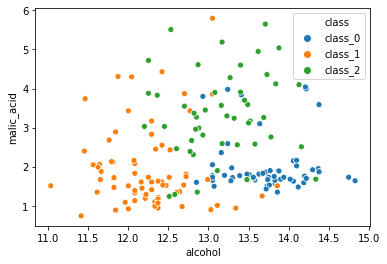

In [4]:
#Point 2
#Plot
ax = sns.scatterplot(x="alcohol", y="malic_acid", hue="class",

                     data=data_fin)

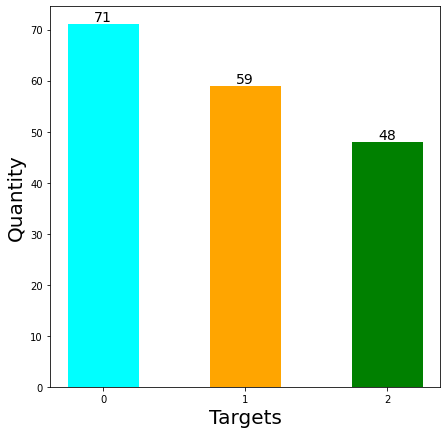

In [5]:
#Number of targets per classes
targets = data_fin['target'].value_counts()
m_height = targets.values.tolist() 
targets.axes 

ind = np.arange(3) 
width = 0.5       
colors = ['cyan','orange','green']
fig, ax = plt.subplots(figsize=(7,7))
target_bars = ax.bar(ind, targets, width, color=colors)


ax.set_xlabel("Targets",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_xticks(ind) 



def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(target_bars)        
plt.show() 

In [6]:
#Point 3
#Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X=data_fin.drop(columns=data_fin.columns[2:])
print(X)
y=data_fin['target']

norm=StandardScaler()
#X_norm= StandardScaler().fit_transform(X)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_val_s = norm.fit_transform(X_train_val)
X_test = norm.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_val_s, y_train_val, test_size=0.29, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

     alcohol  malic_acid
0      14.23        1.71
1      13.20        1.78
2      13.16        2.36
3      14.37        1.95
4      13.24        2.59
..       ...         ...
173    13.71        5.65
174    13.40        3.91
175    13.27        4.28
176    13.17        2.59
177    14.13        4.10

[178 rows x 2 columns]
(88, 2)
(54, 2)
(36, 2)


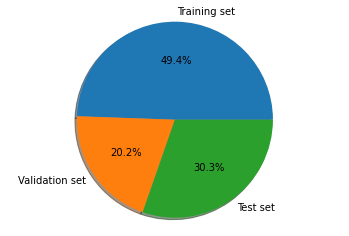

In [7]:
labels = ['Training set','Validation set','Test set']
sizes = [len(X_train),
         len(X_val),
         len(X_test)
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

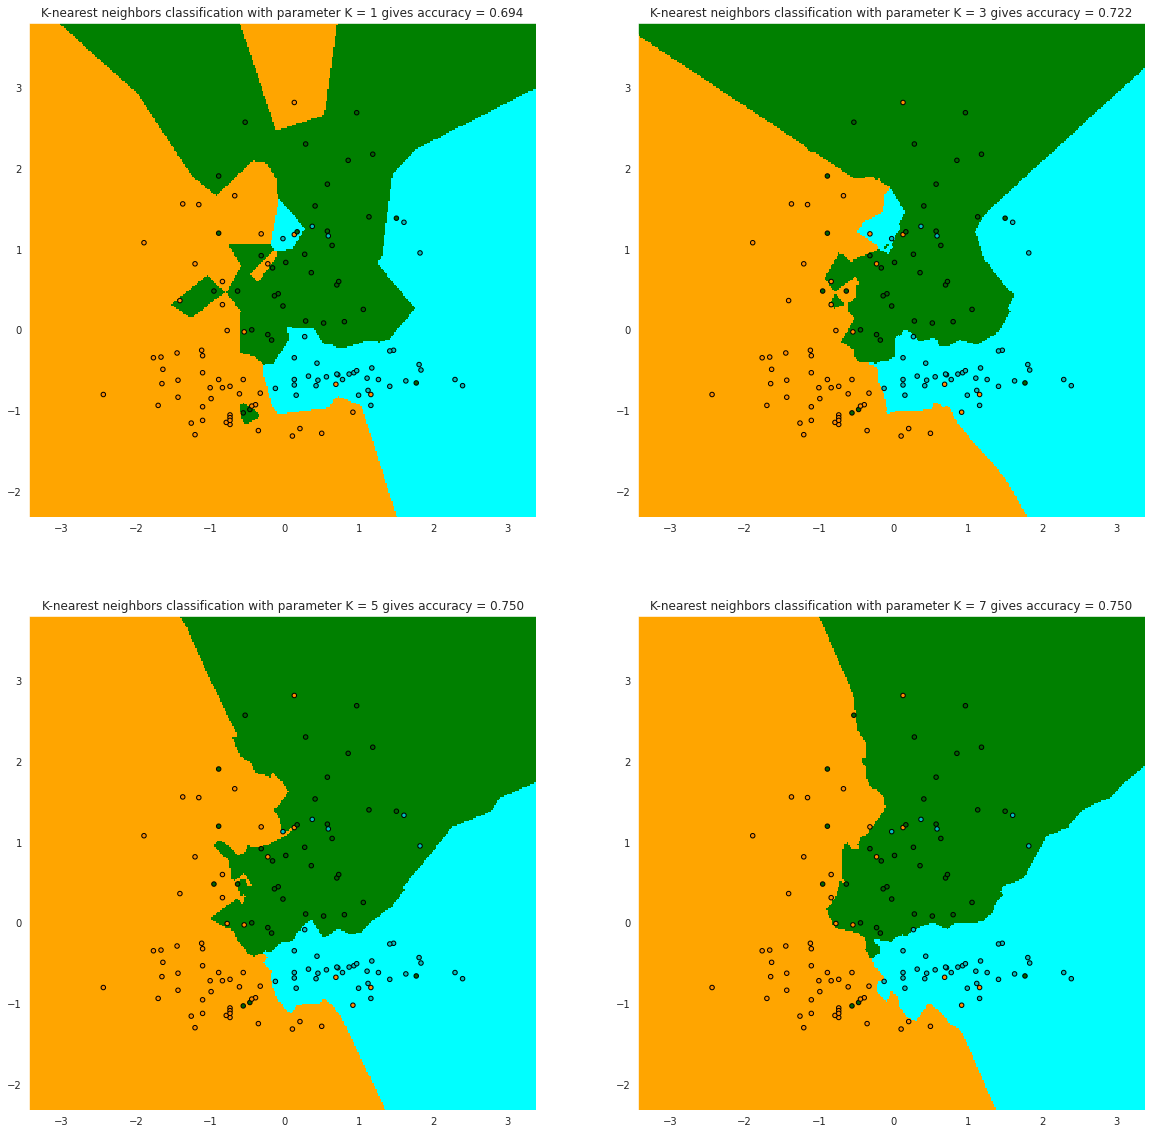

In [26]:
#Point 4-5
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = [1, 3, 5, 7]
scores = []

def KNeighboor(X_train, X_val, y_train, y_val, k):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(2, 2, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]

    for i, n in enumerate(k):
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        y_val_predict = knn.predict(X_val)
        scores.append(metrics.accuracy_score(y_val, y_val_predict))
        
        title = title = "K-nearest neighbors classification with parameter K = %.f gives accuracy = %.3f" % (n, round(scores[i], 3))
        
        plot_decision_boundaries(X_train_val_s, y_train_val.to_numpy(), knn, figure, flat_axes[i], title)
    
    plt.show()


KNeighboor(X_train, X_val, y_train, y_val, k)


0.8148148148148148


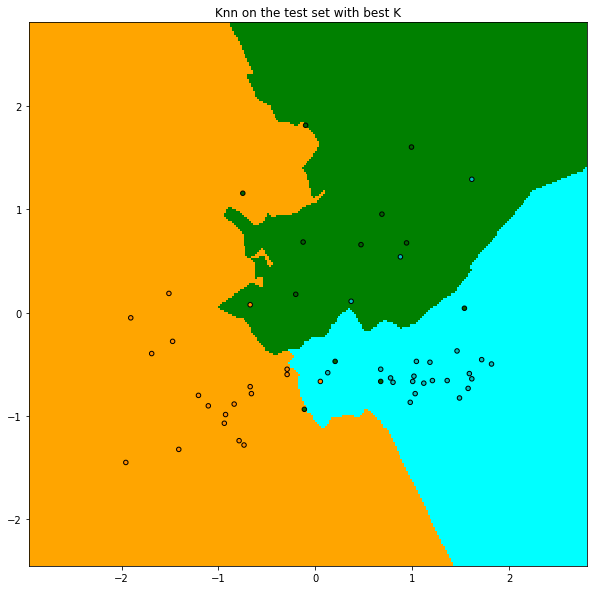

In [9]:
#Point 7
#Application on the test set
    
figure, axes = plt.subplots(figsize=(10, 10))
title="Knn on the test set with best K"  


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
plot_decision_boundaries(X_test, y_test.to_numpy(), knn, figure, axes, title)
print(metrics.accuracy_score(y_test, y_pred))

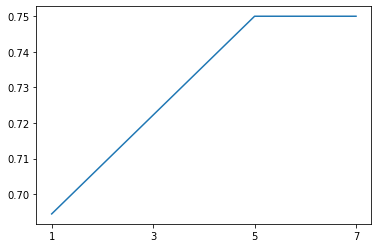

In [10]:
ax = sns.lineplot(x=list(str(par) for par in k), y=scores)

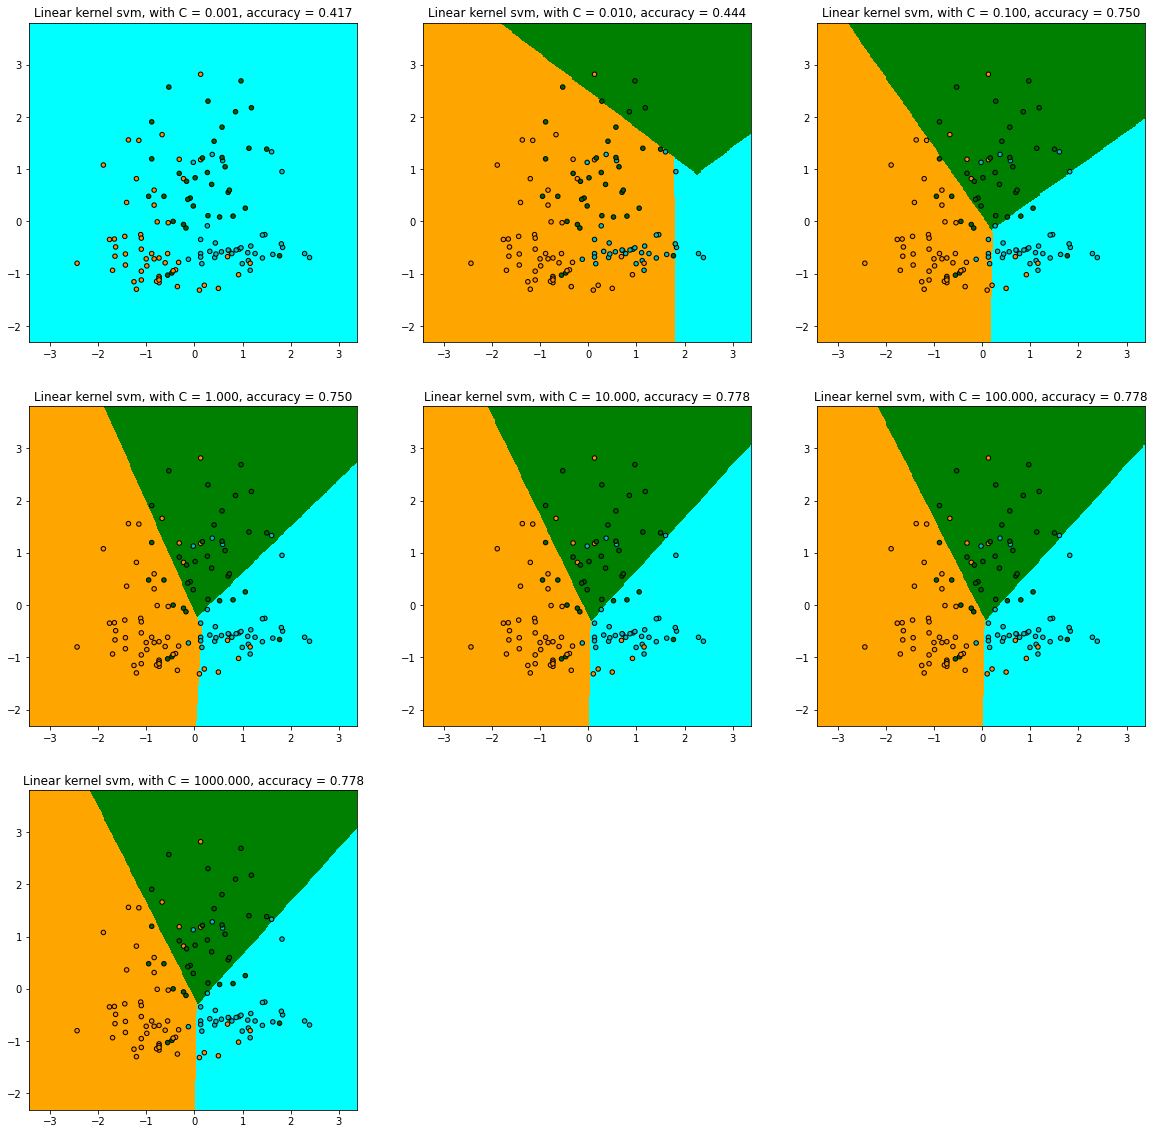

[0.4166666666666667, 0.4444444444444444, 0.75, 0.75, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778]


In [11]:
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10, 100,1000]

scores_Lsvm = []

def Svc_linear(X_train, X_val, y_train, y_val, C):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(3, 3, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]
    
    for i, c in enumerate(C):
        
        svc = SVC(random_state=0, C=c, kernel = 'linear')
        svc.fit(X_train, y_train)
        
        y_val_predict = svc.predict(X_val)
        scores_Lsvm.append(metrics.accuracy_score(y_val, y_val_predict))
        
        title = "Linear kernel svm, with C = %.3f, accuracy = %.3f" % (c, round(scores_Lsvm[i], 3))
        
        plot_decision_boundaries(X_train_val_s, y_train_val.to_numpy(), svc, figure, flat_axes[i], title)
    
    figure.delaxes(axes[2,1])
    figure.delaxes(axes[2,2])
    plt.show()
        
        
Svc_linear(X_train, X_val, y_train, y_val, C)
print(scores_Lsvm)

0.8148148148148148


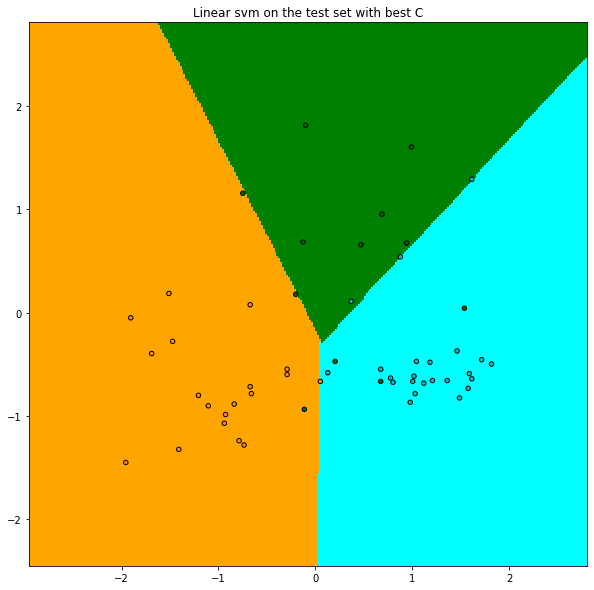

In [12]:
#Point 11
figure, axes = plt.subplots(figsize=(10, 10))
title="Linear svm on the test set with best C"  
svc=SVC(C=100,kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
plot_decision_boundaries(X_test, y_test.to_numpy(), svc, figure, axes, title)
print(metrics.accuracy_score(y_test,y_pred))

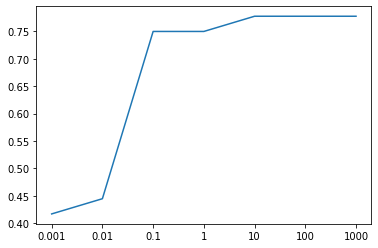

In [13]:
ax = sns.lineplot(x=list(str(par) for par in C), y=scores_Lsvm)

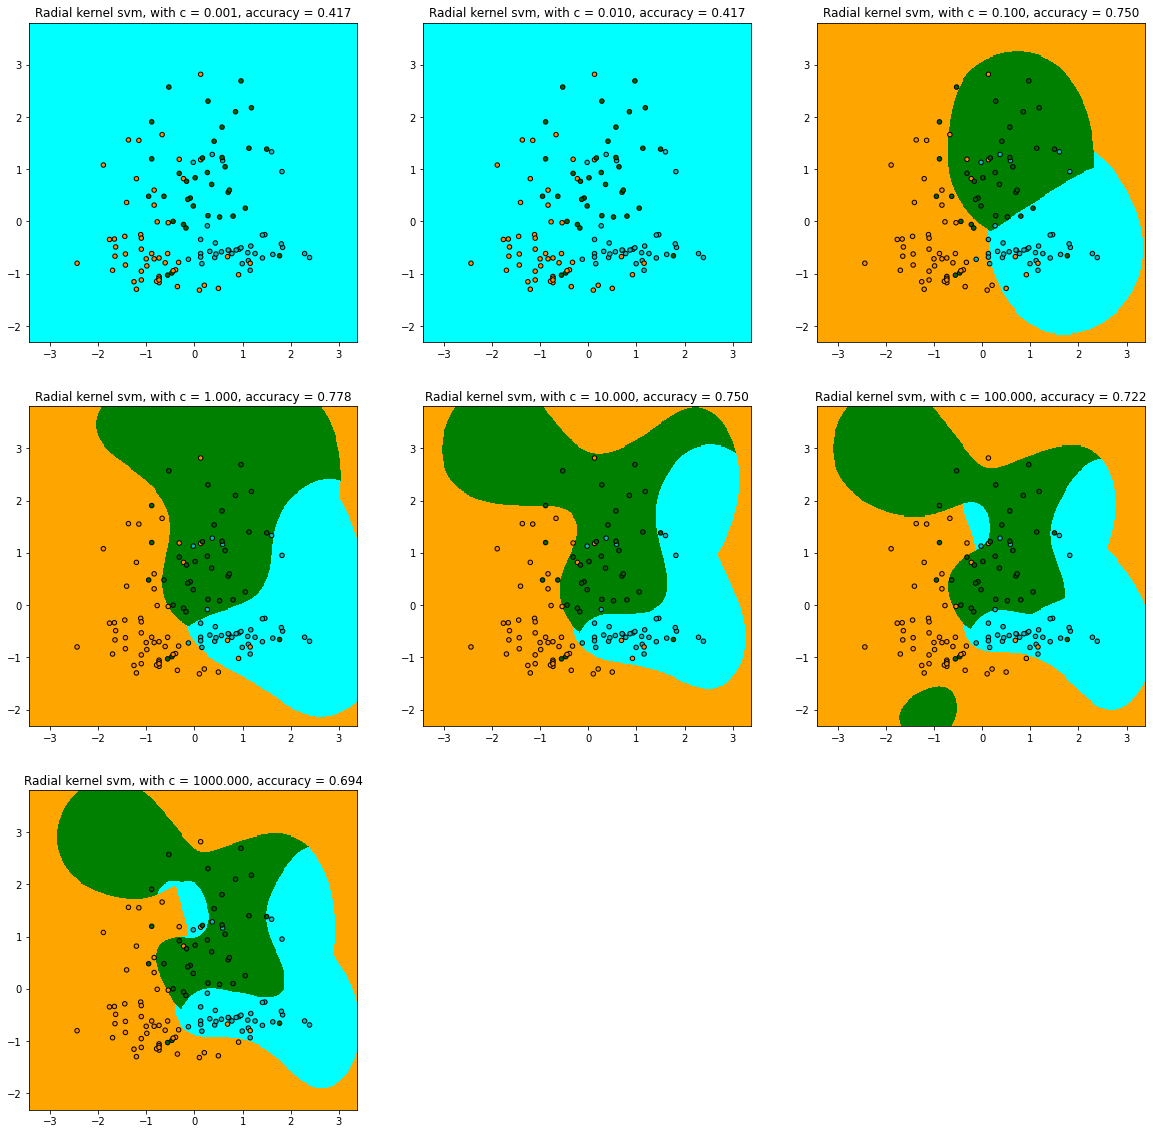

In [14]:
#Point 12
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10, 100,1000]

scores_Ksvm = []

def Svc_radial(X_train, X_val, y_train, y_val, C):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(3, 3, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]
    
    for i, c in enumerate(C):
        
        svc = SVC(random_state=0, C=c, kernel = 'rbf')
        svc.fit(X_train, y_train)
        
        y_val_predict = svc.predict(X_val)
        scores_Ksvm.append(metrics.accuracy_score(y_val, y_val_predict))
        
        title = "Radial kernel svm, with c = %.3f, accuracy = %.3f" % (c, round(scores_Ksvm[i], 3))
        
        plot_decision_boundaries(X_train_val_s, y_train_val.to_numpy(), svc, figure, flat_axes[i], title)
    
    figure.delaxes(axes[2,1])
    figure.delaxes(axes[2,2])
    plt.show()
        
        
Svc_radial(X_train, X_val, y_train, y_val, C)

0.8333333333333334


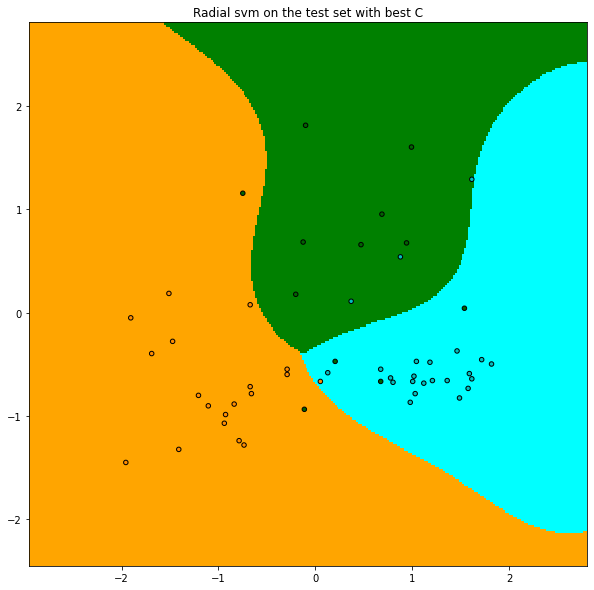

In [15]:
#Point 13
figure, axes = plt.subplots(figsize=(10, 10))
title="Radial svm on the test set with best C"  
svc=SVC(C=1,kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
plot_decision_boundaries(X_test, y_test.to_numpy(), svc, figure, axes, title)
print(metrics.accuracy_score(y_test,y_pred))

In [16]:
#Point 15
from sklearn.model_selection import GridSearchCV


In [17]:
best_score = 0
cs=[]
gammas=[]
scores=[]
for gamma in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        cs.append(C)
        gammas.append(gamma)
        score = svm.score(X_val, y_val)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.81
Best parameters: {'C': 1, 'gamma': 0.1}


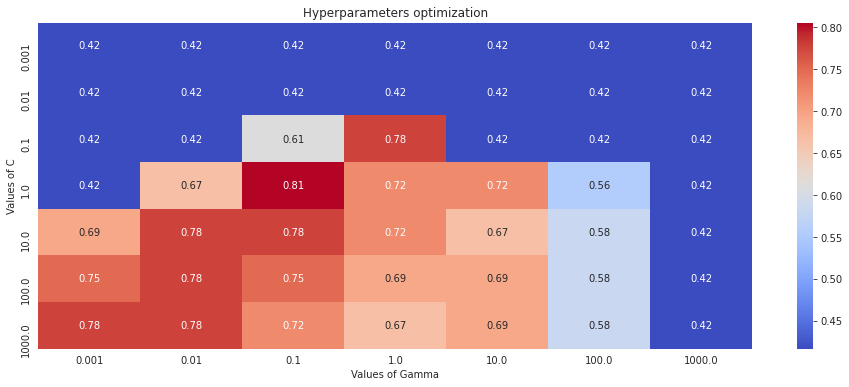

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,6))
data = pd.DataFrame(data={'Values of C':cs, 'Values of Gamma':gammas, 'Scores':scores})
data = data.pivot(index='Values of C', columns='Values of Gamma', values='Scores')
sns.heatmap(data, annot=True, cmap="coolwarm").set_title('Hyperparameters optimization')


plt.show()

0.8703703703703703


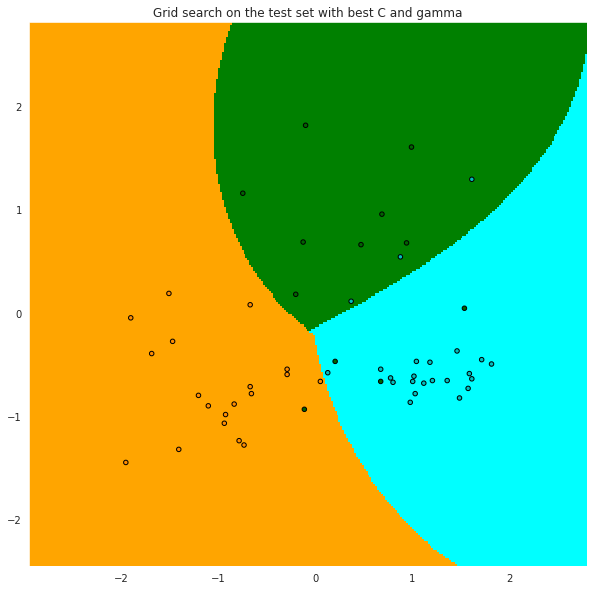

In [19]:
figure, axes = plt.subplots(figsize=(10, 10))
title="Grid search on the test set with best C and gamma"  
svc=SVC(C=1,kernel='rbf',gamma=0.1)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
plot_decision_boundaries(X_test, y_test.to_numpy(), svc, figure, axes, title)
print(metrics.accuracy_score(y_test,y_pred))

In [20]:
#Point 16
X=data_fin.drop(columns=data_fin.columns[2:])
norm=StandardScaler()
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_1 = norm.fit_transform(X_train_1)
X_test_1 = norm.transform(X_test_1)
print(X_train_1.shape)
print(X_test_1.shape)

(124, 2)
(54, 2)


In [21]:
#Point 17
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
            'gamma': [0.001, 0.01, 0.1, 1, 10, 100,1000]
        },
        cv=5,  verbose=0, n_jobs=-1)
grid_result = gsc.fit(X_train_1, y_train_1)
best_params = grid_result.best_params_
best_score=grid_result.best_score_
best_svc = SVC(kernel='rbf', C=best_params["C"], gamma=best_params["gamma"],
                   )
print(best_params)
print(best_score)



{'C': 1, 'gamma': 1}
0.8146666666666667


In [22]:
#Point 18
svc=SVC(C=1,kernel='rbf',gamma=1)
svc.fit(X_train_1,y_train_1)
y_pred=svc.predict(X_test_1)
print(metrics.accuracy_score(y_test_1,y_pred))

0.8703703703703703


In [23]:
wine = load_wine()
features = pd.DataFrame(data=wine['data'],columns=wine['feature_names'])
X=features
#X=StandardScaler().fit_transform(X)
y=wine['target']


Radial support vector machine  with attributes: ('alcohol', 'total_phenols')
Best parameters: {'C': 1, 'gamma': 1}
Accuracy on the test set = 0.8888888888888888


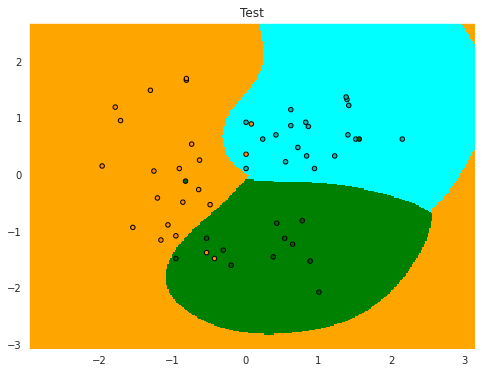

Radial support vector machine  with attributes: ('alcohol', 'flavanoids')
Best parameters: {'C': 1, 'gamma': 1}
Accuracy on the test set = 0.8888888888888888


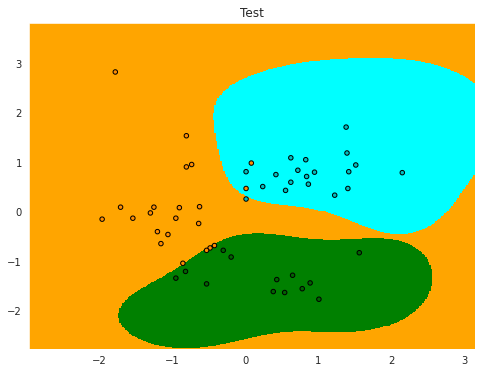

Radial support vector machine  with attributes: ('alcohol', 'hue')
Best parameters: {'C': 10, 'gamma': 0.1}
Accuracy on the test set = 0.9074074074074074


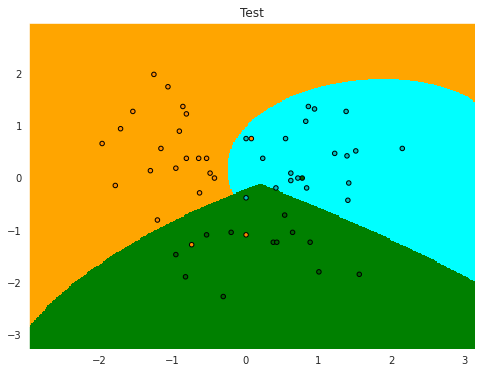

Radial support vector machine  with attributes: ('flavanoids', 'proline')
Best parameters: {'C': 1, 'gamma': 10}
Accuracy on the test set = 0.9259259259259259


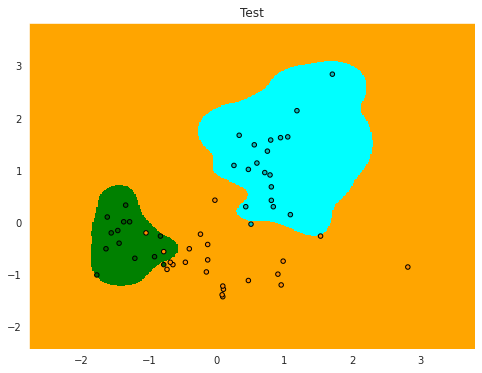

In [24]:
#Point 20
from itertools import combinations


features_others=list(features.columns.values)

comb=list(combinations(features_others, 2))

comb.remove(("alcohol", "malic_acid"))




#I need only the combinations better than alcohol and malic acid.
#I set the best algorithm found for the couple ("alcohol"-"Malic acid")
for o in comb:
    
    X_train_better, X_test_better, y_train_better, y_test_better = train_test_split(X[list(o)], y, test_size=0.3, random_state=0)
    
    X_train_better = StandardScaler().fit_transform(X_train_better)
    X_test_better = StandardScaler().fit_transform(X_test_better)
    # Hyper parameters tuning
    SVM_model = SVC(random_state=0, kernel='rbf')
    param_grid = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100,1000], 'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]}
    gridSearch = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    gridSearch.fit(X_train_better, y_train_better)
    
    clf_SVC_RBF = gridSearch.best_estimator_
    clf_SVC_RBF.fit(X_train_better, y_train_better)
    y_test_predict = clf_SVC_RBF.predict(X_test_better)
    score = accuracy_score(y_test_better, y_test_predict)
    
    if score > 0.8703703703703703:        
        print(f"Radial support vector machine  with attributes: {o}")
        print(f"Best parameters: {gridSearch.best_params_}")
        print(f"Accuracy on the test set = {score}")
        
        
        figure, ax = plt.subplots(1, 1, figsize=(8, 6)) 
        
        title = "Test"
        plot_decision_boundaries(X_test_better, y_test_better, clf_SVC_RBF, figure, ax, title)
        plt.show()
        
        